# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [68]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# define data's path
path = 'Employee.csv'

In [3]:
# read file with read_csv() pandas' method
employee = pd.read_csv(path)

In [4]:
# check if data was correctly imported
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [5]:
# check data's shape
employee.shape

(9, 7)

In [6]:
# check data's info()
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
Name          9 non-null object
Department    9 non-null object
Education     9 non-null object
Gender        9 non-null object
Title         9 non-null object
Years         9 non-null int64
Salary        9 non-null int64
dtypes: int64(2), object(5)
memory usage: 584.0+ bytes


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


* Methods to reshape data: https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [9]:
# Method 1: groupby()
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [26]:
# Method 2: pivot_table()
employee.pivot_table(index='Department', 
                     values='Salary',
                    aggfunc=['mean'])

,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [30]:
employee.pivot_table(index=['Department', 'Title'],
                    values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [31]:
employee.head(1)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35


In [36]:
employee.pivot_table(
    index='Title',
    columns='Years',
    values='Salary',
)

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [38]:
employee.pivot_table(
    values='Salary',
    columns='Department',
    index='Title'

)

Department,HR,IT,Sales
Title,,,
VP,70.0,70.0,NaN
analyst,32.5,32.5,NaN
associate,NaN,60.0,55.0


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [44]:
employee.pivot_table(
    values='Salary',
    columns='Department',
    index='Title',
    aggfunc=['median', 'min', 'max', 'std']
)

median               min               max                   std  \
Department     HR    IT Sales    HR    IT Sales    HR    IT Sales        HR   
VP           70.0  70.0   NaN  70.0  70.0   NaN  70.0  70.0   NaN       NaN   
analyst      32.5  32.5   NaN  30.0  30.0   NaN  35.0  35.0   NaN  3.535534   
associate     NaN  60.0  55.0   NaN  60.0  55.0   NaN  60.0  55.0       NaN   

                            
Department        IT Sales  
VP               NaN   NaN  
analyst     3.535534   NaN  
associate        NaN   0.0

#### Based on your comments, fill the missing values with an appropriate value

In [48]:
employee.pivot_table(
    values='Salary',
    columns='Department',
    index='Title',
    aggfunc=['median', 'min', 'max', 'std'],
    fill_value='0'
)

median             min             max                  std  \
Department     HR    IT Sales  HR    IT Sales  HR    IT Sales       HR   
VP             70  70.0     0  70  70.0     0  70  70.0     0      NaN   
analyst      32.5  32.5     0  30  30.0     0  35  35.0     0  3.53553   
associate       0  60.0    55   0  60.0    55   0  60.0    55        0   

                           
Department       IT Sales  
VP              NaN   NaN  
analyst     3.53553     0  
associate         0     0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [51]:
employee.pivot_table(
    values='Salary',
    columns='Title'
)

Title,VP,analyst,associate
Salary,70.0,32.5,56.666667


#### For each Department and Title, we want to know the total years of work experience and the mean salary

In [52]:
employee.pivot_table(
    values='Salary',
    columns='Department',
    index='Title'

)

Department,HR,IT,Sales
Title,,,
VP,70.0,70.0,NaN
analyst,32.5,32.5,NaN
associate,NaN,60.0,55.0


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [53]:
path_fitbit = 'Fitbit.csv'

In [54]:
fitbit = pd.read_csv(path_fitbit)

In [55]:
fitbit.head(1)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417


In [56]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [58]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [57]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

* Calculate the correlation among two variables by selecting the fist column followed by the method corr() with the second column as a paramether

In [89]:
min_vactive_steps = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

In [91]:
min_vactive_steps

0.5714518481062608

* Calculate the dataset correlation among all columns

In [79]:
# calling the corr() method on the entirely dataset
fitbit_corr = fitbit.corr()

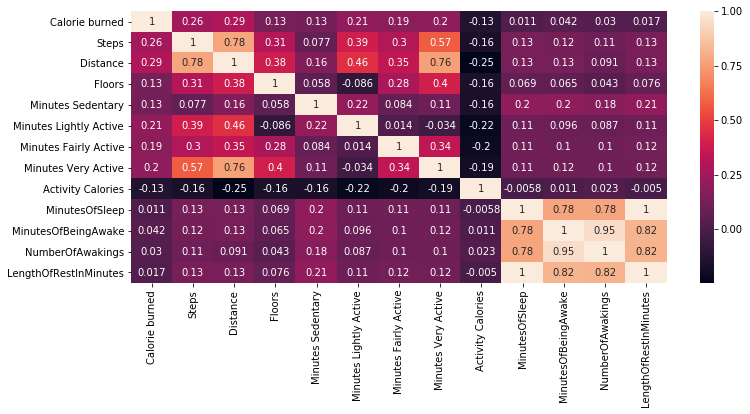

In [83]:
# create an image object with the following dimentions
plt.figure(figsize=(12,5))

# plot the results over a heatmap
sns.heatmap(fitbit_corr,
           annot=True)

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

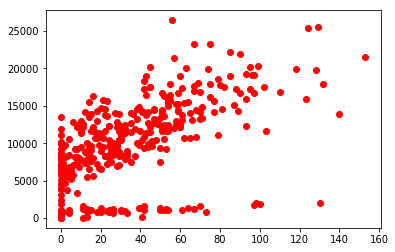

In [87]:
# remember that we have imported matplotlib.pyplot with the alias plt

plt.scatter(x=fitbit['Minutes Very Active'],
           y=fitbit['Steps'],
           color='red')

#### What can you say about Minute Very Active and Steps? Write a comment below

In [94]:
# We can observe a relationship between the columns 'Minutos Very Active' and the 'Steps'
min_vactive_steps = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

In [95]:
min_vactive_steps

0.07690608062990091

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
min_sedent_steps = 

In [ ]:
plt.scatter(x=fitbit['Minutes Sedentary'],
           y=fitbit['Steps'])

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [21]:
# your answer here

In [22]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [24]:
# your answer here

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
# your answer here

In [26]:
#Print cor_fit

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here

In [29]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here